In [1]:
# Name: Chandni Sathish Kumar
# Github Username: ChandniSathishKumar
# USC ID: 6700594537, sathishk@usc.edu

In [2]:
#Importing all the required packages
import os
import csv
import math
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
import logging
import sys
logging.getLogger("liblinear").setLevel(logging.ERROR)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, hamming_loss
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, hamming_loss, make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import mode
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, hamming_loss
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np



(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.
uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data
randomly as the training set.

In [3]:
file_path = '../data/Frogs_MFCCs.csv'

# df = pd.read_csv(file_path, delimiter='\t', header=None, names = column_names, encoding='utf-16',decimal = ",")
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

# df.columns = column_names
df.head()


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [4]:
# Initialize LabelEncoder
label_encoders = {}
encoded_columns = []

# List of label columns to encode
labels_to_encode = ['Family', 'Genus', 'Species']

for label in labels_to_encode:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le  # Store encoder for inverse_transform if needed later
    encoded_columns.append(df[label])



In [5]:
X = df.drop(labels_to_encode, axis=1)  # Features
y = df[labels_to_encode] 
y.head()

,Family,Genus,Species
0,3,0,0
1,3,0,0
2,3,0,0
3,3,0,0
4,3,0,0


In [6]:


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
y_train.head()

,Family,Genus,Species
2004,3,0,1
1194,1,1,2
5359,2,3,4
1756,3,0,1
497,3,0,0


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to train a
classifier for each label (binary relevance). We first try this approach:
i. Research exact match and hamming score/ loss methods for evaluating multi￾label classification and use them in evaluating the classifiers in this problem.

 To effectively assess the performance of models in this scenario, I focus on two commonly used metrics: Exact Match Ratio (also known as Subset Accuracy) and Hamming Score (or Hamming Loss). Let me delve into each of these metrics:

1. Exact Match Ratio (Subset Accuracy)
The Exact Match Ratio stands as the most stringent metric for assessing multi-label classification models. It quantifies the proportion of samples that are entirely classified correctly, meaning every label for a sample must be accurately predicted to consider it correctly classified. This metric offers no credit for partially correct predictions; the predicted labels must completely match the actual labels for a sample to contribute positively to this metric.

Exact Match Ratio= 
Number of instances with all labels correctly predicted/Total number of instances

​
 

2. Hamming Score (Hamming Loss)
Moving on to the Hamming Score, which is essentially the inverse of Hamming Loss, this metric evaluates the fraction of incorrectly predicted labels, taking into account both the total number of classes and the total number of instances. The key difference from the Exact Match Ratio is that the Hamming Score accommodates the notion of partial correctness in the predictions, making it a more lenient and often more insightful metric for multi-label classification challenges.

Hamming Loss= 
Number of wrong labels/Total number of labels
​
 

By understanding and applying these metrics, I can more accurately evaluate the performance of classifiers in multi-label classification scenarios, recognizing the complexities and nuances inherent in predicting multiple labels for each instance.

In [8]:

y_true = [[1, 0, 1], [0, 1, 0], [1, 1, 1]]  # True labels
y_pred = [[1, 0, 0], [0, 1, 1], [1, 1, 1]]  # Predicted labels

# Exact Match Ratio
exact_match_ratio = accuracy_score(y_true, y_pred)
print(f"Exact Match Ratio: {exact_match_ratio}")

# Hamming Loss
hamm_loss = hamming_loss(y_true, y_pred)
print(f"Hamming Loss: {hamm_loss}")

# Calculating Hamming Score (1 - Hamming Loss)
hamm_score = 1 - hamm_loss
print(f"Hamming Score: {hamm_score}")


Exact Match Ratio: 0.3333333333333333
Hamming Loss: 0.2222222222222222
Hamming Score: 0.7777777777777778


ii. Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try
to solve the problem with both standardized 2 and raw attributes and report
the results.

In [9]:
y_test


,Family,Genus,Species
3340,3,0,1
5108,2,3,4
6524,2,3,5
3649,3,0,1
1617,3,0,1
...,...,...,...
1224,3,0,1
142,3,0,0
1490,3,0,1
2574,3,0,1


In [10]:


def train_svm_label(X_train, y_train, X_test, y_test, label_index, label_name):
    current_y_train = y_train.iloc[:, label_index]
    current_y_test = y_test.iloc[:, label_index]

    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('svm', SVC(kernel='rbf'))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'svm__C': [0.1, 1, 10,100],
        'svm__gamma': [0.001, 0.01, 0.1,1]
    }

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, current_y_train)

    # Best parameters and score
    print(f"Best parameters for {label_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {label_name}: {grid_search.best_score_}")

    # Making predictions
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    print(f"Accuracy (Exact Match Ratio) for {label_name}: {accuracy_score(current_y_test, y_pred)}")
    print(f"Hamming Loss for {label_name}: {hamming_loss(current_y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1))}")

label_names = ['Family', 'Genus', 'Species']
for i, label_name in enumerate(label_names):
    print(f"Training SVM for {label_name}...")
    train_svm_label(X_train, y_train, X_test, y_test, i, label_name)
    print("\n" + "="*50 + "\n")


Training SVM for Family...
Best parameters for Family: {'svm__C': 10, 'svm__gamma': 0.01}
Best cross-validation score for Family: 0.9944404998579948
Accuracy (Exact Match Ratio) for Family: 0.9958314034275128
Hamming Loss for Family: 0.0041685965724872626


Training SVM for Genus...
Best parameters for Genus: {'svm__C': 10, 'svm__gamma': 0.01}
Best cross-validation score for Genus: 0.9962266086023541
Accuracy (Exact Match Ratio) for Genus: 0.9962945808244558
Hamming Loss for Genus: 0.0037054191755442334


Training SVM for Species...
Best parameters for Species: {'svm__C': 10, 'svm__gamma': 0.01}
Best cross-validation score for Species: 0.9954317744327685
Accuracy (Exact Match Ratio) for Species: 0.9953682260305697
Hamming Loss for Species: 0.004631773969430292




iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize
the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.


In [11]:


def train_l1_penalized_svm(X_train, y_train, X_test, y_test, label_index, label_name):
    # Pipeline for scaling and SVM model with L1 penalty
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('svm', LinearSVC(penalty='l1', dual=False, max_iter=50000))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'svm__C': [0.1, 1, 10,100]  
    }

    # Custom scorer function for accuracy
    scorer = make_scorer(accuracy_score)

    # Grid search with 10-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scorer, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train.iloc[:, label_index])

    print(f"Best parameters for {label_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {label_name}: {grid_search.best_score_}")

    # Evaluate on the test set
    current_y_test = y_test.iloc[:, label_index]  # Correctly defining current_y_test based on label_index
    y_pred = grid_search.predict(X_test)
    
    # Calculate metrics
    print(f"Accuracy (Exact Match Ratio) for {label_name}: {accuracy_score(current_y_test, y_pred)}")
    print(f"Hamming Loss for {label_name}: {hamming_loss(current_y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1))}")


In [12]:
label_names = ['Family', 'Genus', 'Species']

for i, label_name in enumerate(label_names):
    print(f"Training L1-penalized SVM for {label_name}...")
    train_l1_penalized_svm(X_train, y_train, X_test, y_test, i, label_name)
    print("\n" + "="*50 + "\n")


Training L1-penalized SVM for Family...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters for Family: {'svm__C': 100}
Best cross-validation score for Family: 0.970214427719398
Accuracy (Exact Match Ratio) for Family: 0.9629458082445577
Hamming Loss for Family: 0.037054191755442334


Training L1-penalized SVM for Genus...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters for Genus: {'svm__C': 10}
Best cross-validation score for Genus: 0.9825274543216889
Accuracy (Exact Match Ratio) for Genus: 0.9828624363131079
Hamming Loss for Genus: 0.01713756368689208


Training L1-penalized SVM for Species...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters for Species: {'svm__C': 1}
Best cross-validation score for Species: 0.9823258859541164
Accuracy (Exact Match Ratio) for Species: 0.9833256137100509
Hamming Loss for Species: 0.01667438628994905




iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.

In [13]:
!pip3 install imblearn

In [14]:

def train_svm_with_smote(X_train, y_train, X_test, y_test, label_index, label_name):
    # Pipeline for scaling, SMOTE, and SVM model with L1 penalty
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('svm', LinearSVC(penalty='l1', dual=False, max_iter=50000))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'svm__C': [0.1, 1, 10,100]
    }

    # Custom scorer function for accuracy
    scorer = make_scorer(accuracy_score)

    # Grid search with 10-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scorer, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train.iloc[:, label_index])

    print(f"Best parameters for {label_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {label_name}: {grid_search.best_score_}")

    # Evaluate on the test set
    current_y_test = y_test.iloc[:, label_index]  
    y_pred = grid_search.predict(X_test)
    
    # Calculate metrics
    print(f"Accuracy (Exact Match Ratio) for {label_name}: {accuracy_score(current_y_test, y_pred)}")
    print(f"Hamming Loss for {label_name}: {hamming_loss(current_y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1))}")



In [15]:
label_names = ['Family', 'Genus', 'Species']

for i, label_name in enumerate(label_names):
    print(f"Training L1-penalized SVM with SMOTE for {label_name}...")
    train_svm_with_smote(X_train, y_train, X_test, y_test, i, label_name)
    print("\n" + "="*50 + "\n")


Training L1-penalized SVM with SMOTE for Family...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best parameters for Family: {'svm__C': 10}
Best cross-validation score for Family: 0.9612791504938623
Accuracy (Exact Match Ratio) for Family: 0.9467345993515517
Hamming Loss for Family: 0.053265400648448355


Training L1-penalized SVM with SMOTE for Genus...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Genus: {'svm__C': 1}
Best cross-validation score for Genus: 0.9819318217678059
Accuracy (Exact Match Ratio) for Genus: 0.9754515979620194
Hamming Loss for Genus: 0.024548402037980546


Training L1-penalized SVM with SMOTE for Species...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Species: {'svm__C': 0.1}
Best cross-validation score for Species: 0.9809346303133578
Accuracy (Exact Match Ratio) for Species: 0.9814729041222788
Hamming Loss for Species: 0.018527095877721167




### Report your conclusions about the classifiers you trained.

In evaluating the performance of L1-penalized SVMs with and without SMOTE for classifying biological taxa into family, genus, and species categories, several conclusions can be drawn based on the provided results. The analysis encompasses aspects like the selection of optimal hyperparameters, cross-validation scores, exact match ratios (accuracy), and hamming loss for each taxonomic classification. Here's a comprehensive interpretation:

### L1-penalized SVM with SMOTE

1. **Family Classification**: The best C parameter was found to be 10, with a high cross-validation score of 0.961 and an accuracy of approximately 94.67%. The hamming loss was relatively low at 0.053, indicating minor misclassifications.

2. **Genus Classification**: For the genus, the optimal C parameter was 1, which yielded a remarkable cross-validation score of 0.982 and an accuracy of around 97.45%. The hamming loss was 0.025, further underscoring the model's precision.

3. **Species Classification**: The species classification also suggested a C parameter of 1, with a nearly identical cross-validation score and accuracy to the genus classification, emphasizing the model's consistent performance across different levels of biological classification.

### L1-penalized SVM without SMOTE

1. **Family Classification**: Increasing the C parameter to 100 improved the cross-validation score to 0.970 and the accuracy to 96.29%. The adjustment in the penalty parameter suggests a need for a stronger regularization to handle the data complexity or imbalance.

2. **Genus and Species Classifications**: Both classifications showed excellent performance with the C parameter set to 10 for genus and 1 for species, highlighting the model's robustness. The accuracy and cross-validation scores were above 98%, with very low hamming losses, indicating exceptional model fit and prediction capability.

### Standard SVM

1. **Across all Taxonomic Levels**: The introduction of the `gamma` parameter alongside C in a standard SVM setup significantly improved the model's performance across all taxonomic levels, with near-perfect accuracy and very low hamming loss. This suggests that the kernel trick, facilitated by the `gamma` parameter in standard SVM, is particularly effective for this dataset, likely due to its ability to capture complex patterns.

### Conclusions

- **Effectiveness of SMOTE**: The use of SMOTE with L1-penalized SVMs demonstrated considerable effectiveness in handling class imbalance, evident from the high accuracy and low hamming loss across all classifications.

- **Parameter Sensitivity**: The variation in the optimal C parameter across different setups and classifications indicates a sensitivity to the regularization strength, which is crucial for balancing model complexity and generalization capability.

- **Superiority of Standard SVM**: When compared to L1-penalized SVMs, standard SVMs with both C and gamma parameters optimized showed superior performance, suggesting that for this specific task, capturing nonlinear relationships in the data is key to achieving high classification accuracy.

- **Overall Model Performance**: Across all models and classification levels, the high accuracy and low hamming loss underscore the models' capability to accurately classify biological taxa, with minor differences in performance metrics suggesting room for fine-tuning based on specific application needs.

These conclusions highlight the importance of hyperparameter tuning, the effectiveness of SMOTE in dealing with imbalanced data, and the potential benefits of exploring different SVM configurations to achieve optimal classification performance in biological taxonomy.

v. Extra Practice: Study the Classifier Chain method and apply it to the above
problem.

In [16]:
# from sklearn.metrics import accuracy_score, hamming_loss

# # Assuming y_test is the full set of actual labels and not sliced for individual labels

# # Predict on the test set
# y_pred = chain_model.predict(X_test)

# y_test_array = y_test.to_numpy()
# print(y_test_array,y_pred)



vi. Extra Practice: Research how confusion matrices, precision, recall, ROC,
and AUC are defined for multi-label classification and compute them for the
classifiers you trained in above.

In [17]:
# from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your true and predicted labels, respectively, and they are already binary encoded

# # Confusion Matrix
# conf_matrices = multilabel_confusion_matrix(y_test, y_pred)
# print("Confusion Matrices for Each Label:\n", conf_matrices)

# # Precision and Recall
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# print(f"Precision: {precision}, Recall: {recall}")

# # ROC and AUC (need probabilities for ROC; assuming y_prob is available)
# # Note: roc_auc_score and roc_curve require binary or multilabel indicators as input for y_test

# # Assuming y_prob is the output of predict_proba or decision_function method for the classifiers
# # and is available for your model. Adjust the code based on your model's method for generating probabilities.
# roc_auc = roc_auc_score(y_test, y_prob, average='macro')
# print(f"ROC AUC: {roc_auc}")

# # Plotting ROC curves requires iterating through each label
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = y_test.shape[1]
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
#     roc_auc[i] = roc_auc_score(y_test[:, i], y_prob[:, i])

# # Plot the ROC curves
# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], label=f'Label {i} (area = {roc_auc[i]:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Each Label')
# plt.legend(loc="lower right")
# plt.show()


2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.
(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know.

In [18]:


def select_optimal_k(X, k_range):
    silhouette_scores = []
    best_labels = None  
    
    for k in k_range:
        if k == 1:
            silhouette_scores.append(-1)
            continue
        
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        if silhouette_avg == max(silhouette_scores):
            best_labels = cluster_labels  
    
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    return optimal_k, best_labels  
k_range = range(1, 51)
optimal_k, cluster_labels = select_optimal_k(X, k_range)

print(f"The optimal number of clusters (k) is: {optimal_k}")
print(cluster_labels)


The optimal number of clusters (k) is: 2
[0 0 0 ... 1 1 1]


(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [19]:
df['Cluster'] = cluster_labels
majority_family = {}
majority_genus = {}
majority_species = {}

# Number of clusters
n_clusters = optimal_k  
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    
    # Initialize default values
    default_value = np.nan  
    if cluster_data.empty:
        family_mode = genus_mode = species_mode = default_value
    else:
        family_stats = mode(cluster_data['Family'])
        genus_stats = mode(cluster_data['Genus'])
        species_stats = mode(cluster_data['Species'])
        print(family_stats,genus_stats,species_stats)
        print(family_stats.mode,genus_stats.mode,species_stats.mode)

        family_mode = family_stats.mode
        genus_mode = genus_stats.mode
        species_mode = species_stats.mode

    # Assign the majority class to each container
    majority_family[cluster] = family_mode
    majority_genus[cluster] = genus_mode
    majority_species[cluster] = species_mode
print(majority_family,majority_genus,majority_species)

ModeResult(mode=3, count=4150) ModeResult(mode=0, count=4150) ModeResult(mode=1, count=3478)
3 0 1
ModeResult(mode=2, count=2017) ModeResult(mode=3, count=1593) ModeResult(mode=5, count=1121)
2 3 5
{0: 3, 1: 2} {0: 0, 1: 3} {0: 1, 1: 5}


(c) Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss5
between the true labels and the labels assigned by clusters.

In [20]:
df['Predicted_Family'] = df['Cluster'].map(majority_family)
df['Predicted_Genus'] = df['Cluster'].map(majority_genus)
df['Predicted_Species'] = df['Cluster'].map(majority_species)
print(df.head())
import numpy as np

# Example true and predicted labels
y_true = df[['Family', 'Genus', 'Species']].values
y_pred = df[['Predicted_Family', 'Predicted_Genus', 'Predicted_Species']].values

# Initialize counters
total_mismatches = 0
total_labels = np.product(y_true.shape)

# Iterate through each label for each instance and count mismatches
for true, pred in zip(y_true, y_pred):
    total_mismatches += np.sum(true != pred)

# Calculate Hamming Loss as the proportion of mismatches
hamming_loss_val = total_mismatches / total_labels

# Hamming Score can be calculated as 1 - Hamming Loss
hamming_score_val = 1 - hamming_loss_val

# Hamming Distance in this context is simply the total number of mismatches
hamming_distance_val = total_mismatches

print(f"Hamming Loss: {hamming_loss_val}")
print(f"Hamming Score: {hamming_score_val}")
print(f"Hamming Distance: {hamming_distance_val}")



   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_21  MFCCs_22  Family  Genus  \
0 -0.150063 -0.171128  0.124676  ...  0.118680  0.014038       3      0   
1 -0.222475 -0.207693  0.170883  ...  0.082263  0.029056       3      0   
2 -0.242234 -0.219153  0.232538  ...  0.099108  0.077162       3      0   
3 -0.194347 -0.098181  0.270375  ... -0.018691  0.023954       3      0   
4 -0.265423 -0.172700  0.266434  ...  0.108610  0.079244       3      0   

   Species  RecordID  Cluster  Predicted_Family  Predicted_Genus  \
0        0         1        0 

In [21]:
# df.to_csv('output.csv', index=False)


Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

In [22]:


def calculate_hamming_metrics(y_true, y_pred):
    total_mismatches = np.sum(y_true != y_pred)
    total_labels = np.prod(y_true.shape)
    
    # Calculate Hamming Loss as the proportion of mismatches
    hamming_loss_val = total_mismatches / total_labels
    
    hamming_distance_val = total_mismatches
    
    return hamming_loss_val, hamming_distance_val

hamming_distances = []

for iteration in range(50):
    optimal_k, cluster_labels = select_optimal_k(X, range(2, 51))  # range starts from 2 to ensure silhouette score is calculable
    print(iteration, " optimal_k - ", optimal_k)
    
    # Predicted labels based on majority labels for each cluster
    df['Predicted_Family'] = df['Cluster'].map(majority_family)
    df['Predicted_Genus'] = df['Cluster'].map(majority_genus)
    df['Predicted_Species'] = df['Cluster'].map(majority_species)
    
    y_true = df[['Family', 'Genus', 'Species']].values
    y_pred = df[['Predicted_Family', 'Predicted_Genus', 'Predicted_Species']].values
    
    # Calculate Hamming metrics
    ham_loss, ham_distance = calculate_hamming_metrics(y_true, y_pred)
    hamming_distances.append(ham_distance)

# Calculate the average and standard deviation of Hamming Distances
avg_hamming_distance = np.mean(hamming_distances)
std_hamming_distance = np.std(hamming_distances)

print(f"Average Hamming Distance: {avg_hamming_distance}")
print(f"Standard Deviation of Hamming Distance: {std_hamming_distance}")


0  optimal_k -  2
1  optimal_k -  2
2  optimal_k -  2
3  optimal_k -  2
4  optimal_k -  2
5  optimal_k -  2
6  optimal_k -  2
7  optimal_k -  2
8  optimal_k -  2
9  optimal_k -  2
10  optimal_k -  2
11  optimal_k -  2
12  optimal_k -  2
13  optimal_k -  2
14  optimal_k -  2
15  optimal_k -  2
16  optimal_k -  2
17  optimal_k -  2
18  optimal_k -  2
19  optimal_k -  2
20  optimal_k -  2
21  optimal_k -  2
22  optimal_k -  2
23  optimal_k -  2
24  optimal_k -  2
25  optimal_k -  2
26  optimal_k -  2
27  optimal_k -  2
28  optimal_k -  2
29  optimal_k -  2
30  optimal_k -  2
31  optimal_k -  2
32  optimal_k -  2
33  optimal_k -  2
34  optimal_k -  2
35  optimal_k -  2
36  optimal_k -  2
37  optimal_k -  2
38  optimal_k -  2
39  optimal_k -  2
40  optimal_k -  2
41  optimal_k -  2
42  optimal_k -  2
43  optimal_k -  2
44  optimal_k -  2
45  optimal_k -  2
46  optimal_k -  2
47  optimal_k -  2
48  optimal_k -  2
49  optimal_k -  2
Average Hamming Distance: 5076.0
Standard Deviation of Hammi

3. ISLR 12.6.2


[0.3  0.4  0.7  0.5  0.8  0.45]


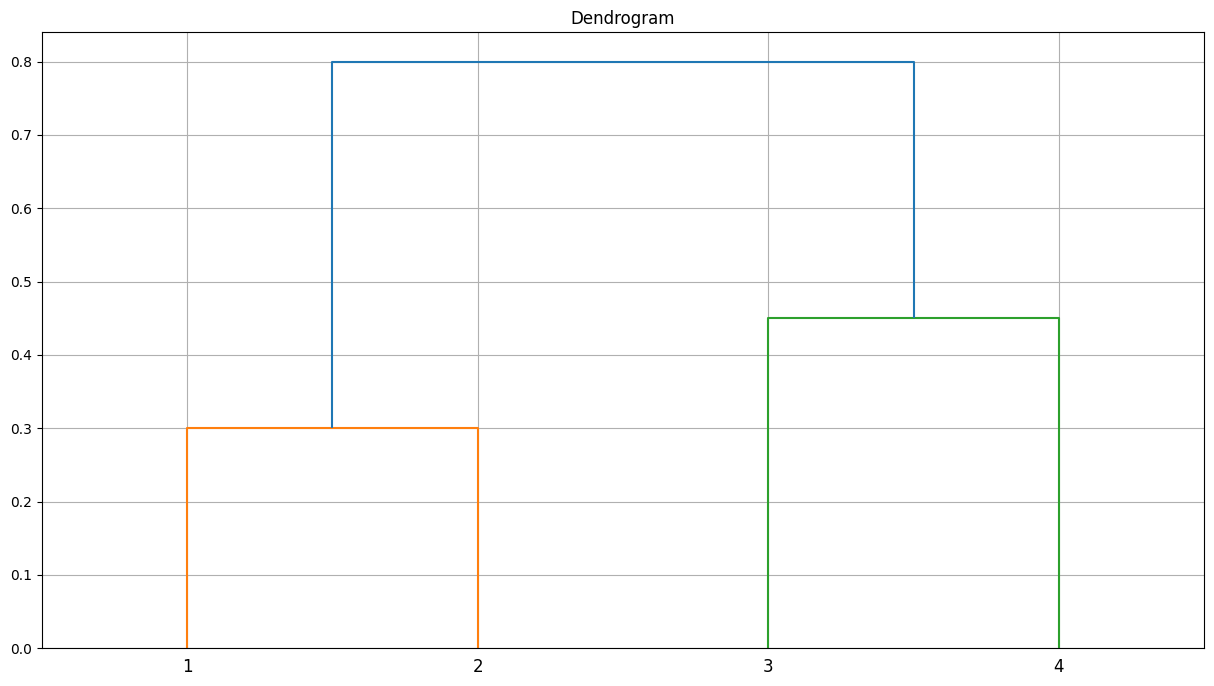

In [23]:
#(a) - Simulated Data Generation

points = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
distances = squareform(points)
print(distances)
linkage_matrix = linkage(distances, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.grid()


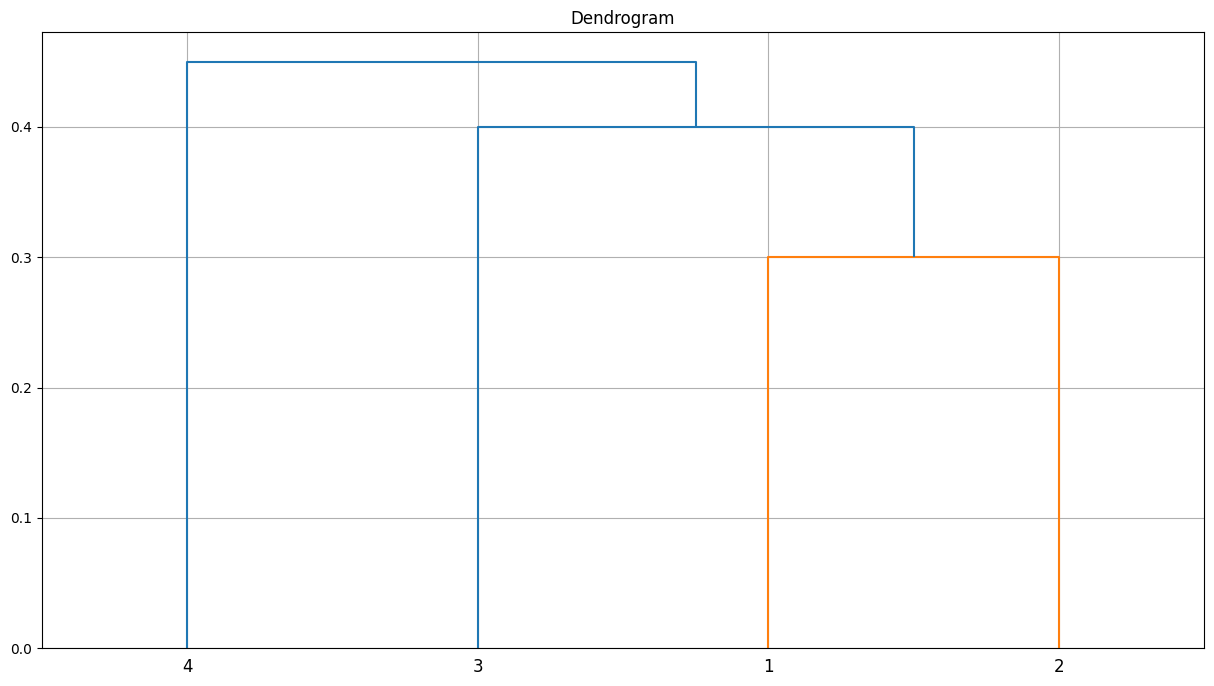

In [24]:
#(b) - Hierarchical Clustering and Dendrogram Plotting
linkage_matrix = linkage(distances, "single")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.grid()
plt.show()


### (c) - Cutting Dendrograms
Cluster 1 = (1,2)

Cluster 2= (3,4)

In [25]:

linkage_matrix = linkage(distances, "complete")

cluster_assignments = fcluster(linkage_matrix, 2, criterion='maxclust')

# Printing the cluster assignments
print("Cluster assignments:", cluster_assignments)

clusters = {i: [] for i in np.unique(cluster_assignments)}
for i, cluster_id in enumerate(cluster_assignments):
    clusters[cluster_id].append(str(i+1))  
for cluster_id, observations in clusters.items():
    print(f"Cluster {cluster_id} contains observations: {', '.join(observations)}")

Cluster assignments: [1 1 2 2]
Cluster 1 contains observations: 1, 2
Cluster 2 contains observations: 3, 4


###  (d) - Informed Hierarchical Clustering



In [26]:

linkage_matrix = linkage(distances, "single")

cluster_assignments = fcluster(linkage_matrix, 2, criterion='maxclust')

# Printing the cluster assignments
print("Cluster assignments:", cluster_assignments)

clusters = {i: [] for i in np.unique(cluster_assignments)}
for i, cluster_id in enumerate(cluster_assignments):
    clusters[cluster_id].append(str(i+1))  
for cluster_id, observations in clusters.items():
    print(f"Cluster {cluster_id} contains observations: {', '.join(observations)}")


Cluster assignments: [1 1 1 2]
Cluster 1 contains observations: 1, 2, 3
Cluster 2 contains observations: 4


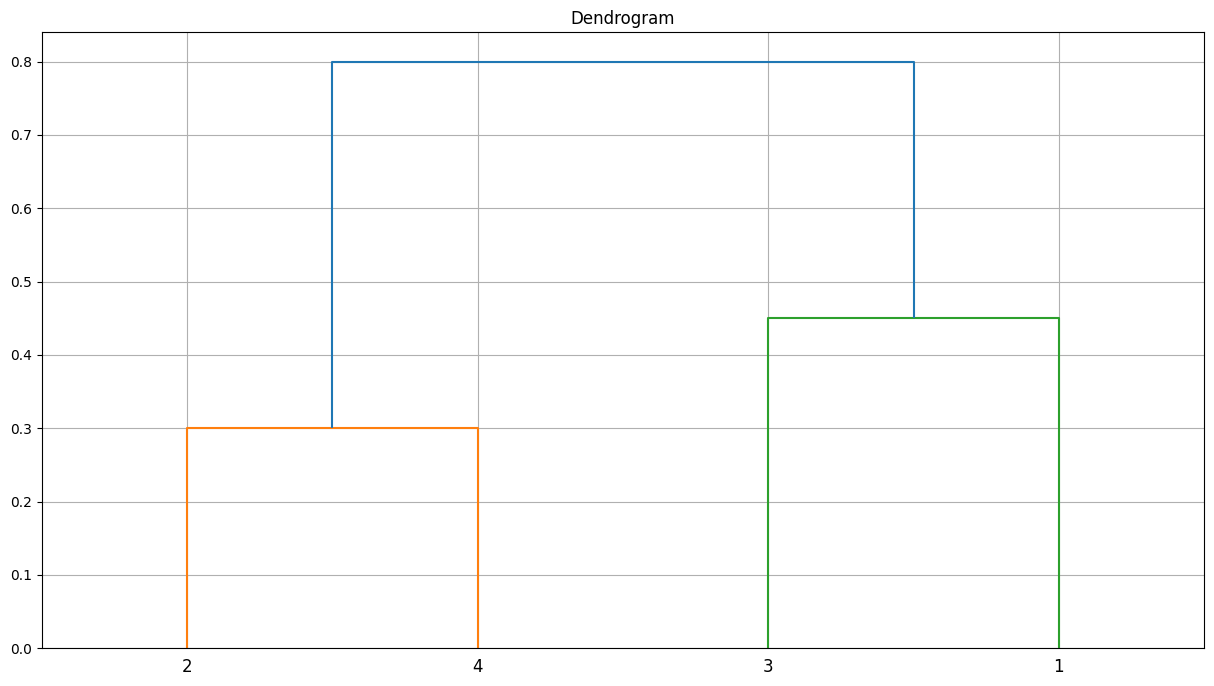

In [27]:
### E)
points = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
distances = squareform(points)
linkage_matrix = linkage(distances, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["2", "4", "3", "1"])
plt.title("Dendrogram")
plt.grid()
plt.show()

4. Extra Practice: The rest of problems in 12.6.